In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import HTML
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Get the data
df = pd.read_csv('/content/sample_data/Data_Gov_Tamil_Nadu.csv')
df.info()



,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,NaN,NaN,NaN,01-12-1961,Tamil Nadu,0,0.0,NaN,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0,0.0,NaN,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,NaN,NaN,NaN,01-03-1982,Tamil Nadu,0,0.0,NaN,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,NaN,NaN,NaN,NaN,Tamil Nadu,0,0.0,NaN,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0,0.0,NaN,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN


In [6]:
#check Duplicate Data
print(df.duplicated().sum())

0


In [17]:
#date and time is converted object in to datetime64
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'])
df['day_of_week'] = df['DATE_OF_REGISTRATION'].dt.day_name()
df['month'] = df['DATE_OF_REGISTRATION'].dt.month
df['year'] = df['DATE_OF_REGISTRATION'].dt.year
print(df['DATE_OF_REGISTRATION'])


0      1961-01-12
1             NaT
2      1982-01-03
3             NaT
4             NaT
          ...    
3850   2014-10-13
3851   2014-04-12
3852   2014-12-23
3853   2015-06-01
3854   2015-12-01
Name: DATE_OF_REGISTRATION, Length: 3855, dtype: datetime64[ns]


<ipython-input-17-567c77add6ae>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'])


In [20]:
#checking the missing values
print(df.isnull().sum())

CORPORATE_IDENTIFICATION_NUMBER           0
COMPANY_NAME                              0
COMPANY_STATUS                            0
COMPANY_CLASS                             0
COMPANY_CATEGORY                          0
COMPANY_SUB_CATEGORY                      0
DATE_OF_REGISTRATION                      0
REGISTERED_STATE                          0
AUTHORIZED_CAP                            0
PAIDUP_CAPITAL                            0
INDUSTRIAL_CLASS                          0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN    0
REGISTERED_OFFICE_ADDRESS                 0
REGISTRAR_OF_COMPANIES                    0
EMAIL_ADDR                                0
LATEST_YEAR_ANNUAL_RETURN                 0
LATEST_YEAR_FINANCIAL_STATEMENT           0
day_of_week                               0
month                                     0
year                                      0
dtype: int64


In [19]:
# fill missing values in column with their most repeated
df['COMPANY_CLASS'].fillna(df['COMPANY_CLASS'].mode()[0], inplace=True)
df['COMPANY_CATEGORY'].fillna(df['COMPANY_CATEGORY'].mode()[0], inplace=True)
df['COMPANY_SUB_CATEGORY'].fillna(df['COMPANY_SUB_CATEGORY'].mode()[0], inplace=True)
df['DATE_OF_REGISTRATION'].fillna(df['DATE_OF_REGISTRATION'].mode()[0], inplace=True)
df['INDUSTRIAL_CLASS'].fillna(df['INDUSTRIAL_CLASS'].mode()[0], inplace=True)
df['REGISTERED_OFFICE_ADDRESS'].fillna(df['REGISTERED_OFFICE_ADDRESS'].mode()[0], inplace=True)
df['REGISTRAR_OF_COMPANIES'].fillna(df['REGISTRAR_OF_COMPANIES'].mode()[0], inplace=True)
df['EMAIL_ADDR'].fillna(df['EMAIL_ADDR'].mode()[0], inplace=True)
df['LATEST_YEAR_ANNUAL_RETURN'].fillna(df['LATEST_YEAR_ANNUAL_RETURN'].mode()[0], inplace=True)
df['LATEST_YEAR_FINANCIAL_STATEMENT'].fillna(df['LATEST_YEAR_FINANCIAL_STATEMENT'].mode()[0], inplace=True)
df['day_of_week'].fillna(df['day_of_week'].mode()[0], inplace=True)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)


In [21]:
print(df.isnull().sum())

CORPORATE_IDENTIFICATION_NUMBER           0
COMPANY_NAME                              0
COMPANY_STATUS                            0
COMPANY_CLASS                             0
COMPANY_CATEGORY                          0
COMPANY_SUB_CATEGORY                      0
DATE_OF_REGISTRATION                      0
REGISTERED_STATE                          0
AUTHORIZED_CAP                            0
PAIDUP_CAPITAL                            0
INDUSTRIAL_CLASS                          0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN    0
REGISTERED_OFFICE_ADDRESS                 0
REGISTRAR_OF_COMPANIES                    0
EMAIL_ADDR                                0
LATEST_YEAR_ANNUAL_RETURN                 0
LATEST_YEAR_FINANCIAL_STATEMENT           0
day_of_week                               0
month                                     0
year                                      0
dtype: int64


In [22]:
print(df['DATE_OF_REGISTRATION'])

0      1961-01-12
1      2002-02-28
2      1982-01-03
3      2002-02-28
4      2002-02-28
          ...    
3850   2014-10-13
3851   2014-04-12
3852   2014-12-23
3853   2015-06-01
3854   2015-12-01
Name: DATE_OF_REGISTRATION, Length: 3855, dtype: datetime64[ns]


In [23]:
# interpolate missing values using linear interpolation
df['COMPANY_CLASS'].interpolate(inplace=True)
df['COMPANY_CATEGORY'].interpolate(inplace=True)
df['COMPANY_SUB_CATEGORY'].interpolate(inplace=True)
df['INDUSTRIAL_CLASS'].interpolate(inplace=True)
df['REGISTERED_OFFICE_ADDRESS'].interpolate(inplace=True)
df['REGISTRAR_OF_COMPANIES'].interpolate(inplace=True)
df['EMAIL_ADDR'].interpolate(inplace=True)
df['LATEST_YEAR_ANNUAL_RETURN'].interpolate(inplace=True)
df['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(inplace=True)

In [ ]:
# standardize the numerical data
encoder = LabelEncoder()
df['COMPANY_CLASS'] = encoder.fit_transform(df['COMPANY_CLASS'])
df['COMPANY_CLASS'] = encoder.fit_transform(df['COMPANY_CLASS'])
print(df['COMPANY_CLASS'].to_string())


In [ ]:
df.describe()


,COMPANY_CLASS,AUTHORIZED_CAP,PAIDUP_CAPITAL,month,year
count,150871.000000,1.508710e+05,1.508710e+05,150871.000000,150871.000000
mean,0.163060,3.522781e+07,2.328824e+07,6.500978,2004.326226
std,0.534261,1.408554e+09,1.072458e+09,3.437279,13.135028
min,0.000000,0.000000e+00,0.000000e+00,1.000000,1872.000000
25%,0.000000,1.000000e+05,1.000000e+05,3.000000,1996.000000
50%,0.000000,8.000000e+05,1.000000e+05,6.000000,2008.000000
75%,0.000000,2.000000e+06,6.857450e+05,9.000000,2014.000000
max,2.000000,3.000000e+11,2.461235e+11,12.000000,2020.000000


<ipython-input-25-6b0f55953ca2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


<Axes: >

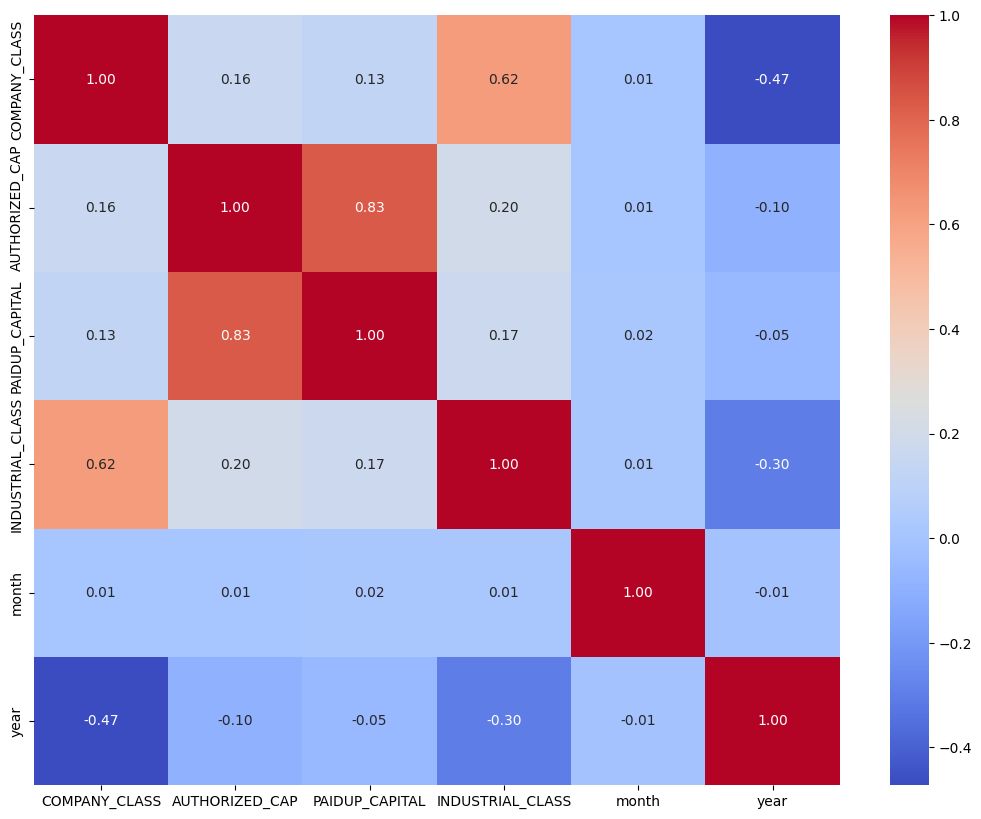

In [25]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

<Axes: xlabel='month', ylabel='AUTHORIZED_CAP'>

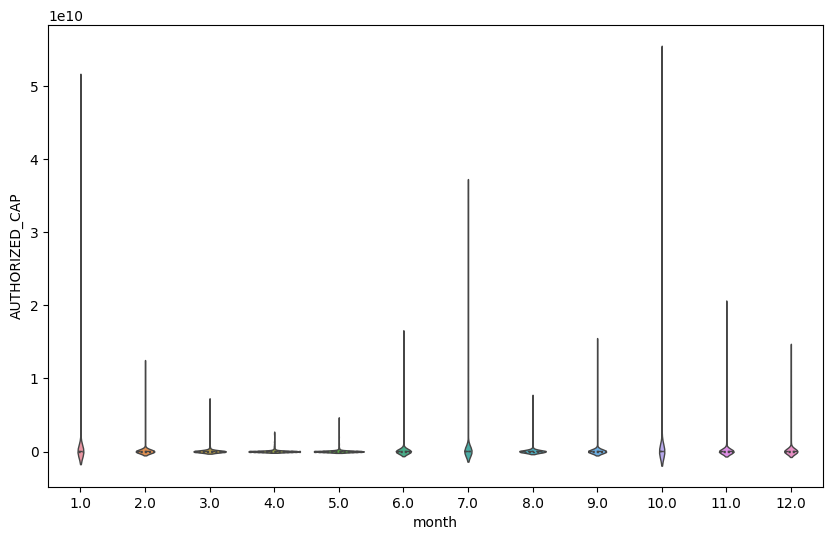

In [26]:
# Explore AUTHORIZED_CAP vs month
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="month", y="AUTHORIZED_CAP",
               split=True, inner="quart", linewidth=1)

In [15]:
df['COMPANY_CATEGORY'].unique()

array([nan, 'Company limited by Shares', 'Company Limited by Guarantee'],
      dtype=object)

In [28]:
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,day_of_week,month,year
0,F00643,"HOCHTIEFF AG,",NAEF,0,Company limited by Shares,Non-govt company,1961-01-12,Tamil Nadu,0,0.0,1119.0,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,gauthamasokan@gmail.com,31-03-2019,31-03-2019,Thursday,1.0,1961.0
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,0,Company limited by Shares,Non-govt company,2002-02-28,Tamil Nadu,0,0.0,1119.0,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,31-03-2019,31-03-2019,Wednesday,3.0,2018.0
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,0,Company limited by Shares,Non-govt company,1982-01-03,Tamil Nadu,0,0.0,1119.0,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,31-03-2019,31-03-2019,Sunday,1.0,1982.0
3,F01208,CALTEX INDIA LIMITED,NAEF,0,Company limited by Shares,Non-govt company,2002-02-28,Tamil Nadu,0,0.0,1119.0,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,gauthamasokan@gmail.com,31-03-2019,31-03-2019,Wednesday,3.0,2018.0
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,0,Company limited by Shares,Non-govt company,2002-02-28,Tamil Nadu,0,0.0,1119.0,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,31-03-2019,31-03-2019,Wednesday,3.0,2018.0


In [31]:
# feature engineering (detect outliers)
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,['AUTHORIZED_CAP', 'PAIDUP_CAPITAL',
                                            'month', 'year' ])

In [32]:
#remove outliers
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [30]:
#  model evaluation
x = df[['year']]
y = df['COMPANY_CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
#prediction model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5467275412583471


In [35]:
#future trends
future_years = pd.DataFrame({'year':[2023, 2024, 2025,2026]})
future_registrations = model.predict(future_years)
print(f"prediction registrations for 2023: {future_registrations[0]}")
print(f"prediction registrations for 2024: {future_registrations[1]}")
print(f"prediction registrations for 2025: {future_registrations[2]}")


prediction registrations for 2023: 0.10621649690329316
prediction registrations for 2024: 0.10621649690329316
prediction registrations for 2025: 0.10621649690329316


In [36]:

def analyze_grid_result(grid_result):

    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)

    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

In [37]:
#logistic regression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)
# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 17 members, which is less than n_splits=50.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lo

Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7892755156002115
0.789 (+/-0.058) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765 (+/-0.014) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.789 (+/-0.058) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765 (+/-0.014) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.789 (+/-0.058) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765 (+/-0.014) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.789 (+/-0.058) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765 (+/-0.014) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.789 (+/-0.058) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765 (+/-0.014) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       596
           1   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

In [38]:
# Test predictions
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       596
           1       0.00      0.00      0.00         2
           2       0.59      0.28      0.38       173

    accuracy                           0.79       771
   macro avg       0.47      0.41      0.42       771
weighted avg       0.76      0.79      0.76       771



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
